In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [29]:
city_file_to_load = 'Resources/city_data.csv'
ride_file_to_load = 'Resources/ride_data.csv'
pyber_city_df = pd.read_csv(city_file_to_load)
pyber_ride_df = pd.read_csv(ride_file_to_load)


In [30]:
pyber_city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [31]:
pyber_city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [32]:
pyber_city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [33]:
pyber_city_df[['city','driver_count','type']].isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [34]:
pyber_city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [35]:
sum(pyber_city_df['type']=='Urban')

66

In [36]:
sum(pyber_city_df['type']=='Suburban')

36

In [37]:
sum(pyber_city_df['type']=='Rural')

18

In [38]:
pyber_ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [39]:
pyber_ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [40]:
pyber_ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [41]:
pyber_ride_df[['city','date','fare','ride_id']].isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [42]:
pyber_complete_df = pd.merge(pyber_ride_df,pyber_city_df,on=['city','city'],how='left')

In [43]:
pyber_complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [44]:
pyber_complete_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [45]:
pyber_complete_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [46]:
pyber_by_city_average_df = pyber_complete_df.groupby('type').mean()['fare']

In [47]:
pyber_by_city_average_df.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [48]:
urban_cities_df = pyber_complete_df[pyber_complete_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [49]:
rural_cities_df = pyber_complete_df[pyber_complete_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [50]:
suburban_cities_df = pyber_complete_df[pyber_complete_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [51]:
urban_cities_ride_count_df = urban_cities_df.groupby('city')['ride_id'].count()
urban_cities_ride_count_df.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [52]:
rural_cities_ride_count_df = rural_cities_df.groupby('city')['ride_id'].count()
rural_cities_ride_count_df.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [53]:
suburban_cities_ride_count_df = suburban_cities_df.groupby('city')['ride_id'].count()
suburban_cities_ride_count_df.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [56]:
urban_average_fare_df = urban_cities_df.groupby('city').mean()['fare']
urban_average_fare_df.describe()

count    66.000000
mean     24.499122
std       2.190653
min      20.093158
25%      22.799102
50%      24.476732
75%      25.965357
max      28.993750
Name: fare, dtype: float64

In [57]:
rural_average_fare_df = rural_cities_df.groupby('city').mean()['fare']
rural_average_fare_df.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [58]:
suburban_average_fare_df = suburban_cities_df.groupby('city').mean()['fare']
suburban_average_fare_df.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [59]:
urban_average_drivers_df = urban_cities_df.groupby('city').mean()['driver_count']
urban_average_drivers_df.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [60]:
rural_average_drivers_df = rural_cities_df.groupby('city').mean()['driver_count']
rural_average_drivers_df.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

In [61]:
suburban_average_drivers_df = suburban_cities_df.groupby('city').mean()['driver_count']
suburban_average_drivers_df.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

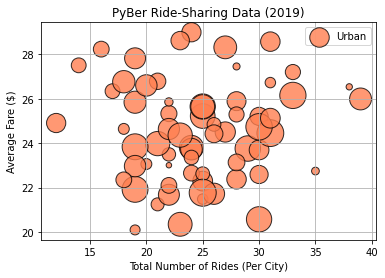

In [63]:
plt.scatter(urban_cities_ride_count_df,
            urban_average_fare_df,
            label='Urban',c='coral',
            s=urban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

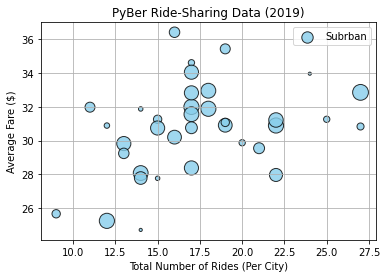

In [64]:
plt.scatter(suburban_cities_ride_count_df,
            suburban_average_fare_df,
            label='Subrban',c='skyblue',
            s=suburban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

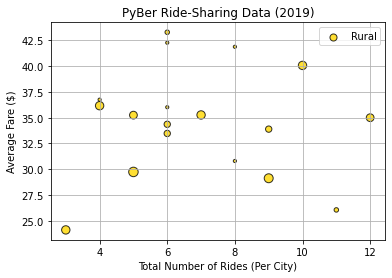

In [65]:
plt.scatter(rural_cities_ride_count_df,
            rural_average_fare_df,
            label='Rural',c='gold',
            s=rural_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

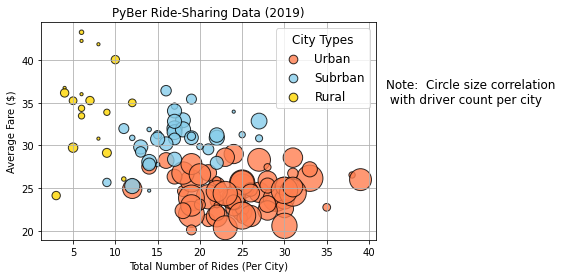

In [66]:
plt.scatter(urban_cities_ride_count_df,
            urban_average_fare_df,
            label='Urban',c='coral',
            s=urban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)


plt.scatter(suburban_cities_ride_count_df,
            suburban_average_fare_df,
            label='Subrban',c='skyblue',
            s=suburban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)


plt.scatter(rural_cities_ride_count_df,
            rural_average_fare_df,
            label='Rural',c='gold',
            s=rural_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create the legend
lgnd = plt.legend(fontsize = '12', mode = 'Expanded',
                 scatterpoints = 1, loc = 'best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,"Note:  Circle size correlation \n with driver count per city",fontsize='12')

#plt.savefig("Analysis/PyBer_Ride_Sharing_Data2019.png")
plt.show()

In [67]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [68]:
suburban_cities_df.groupby('city').count().describe()['ride_id']



count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [69]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [70]:
rural_cities_df.groupby('city').count().describe()['ride_id']

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [71]:
round(urban_cities_ride_count_df.mean(),2),round(suburban_cities_ride_count_df.mean(),2),round(rural_cities_ride_count_df.mean(),2)

(24.62, 17.36, 6.94)

In [72]:
round(urban_cities_ride_count_df.median(),2),round(suburban_cities_ride_count_df.median(),2),round(rural_cities_ride_count_df.median(),2)

(24.0, 17.0, 6.0)

In [73]:
suburban_cities_ride_count_df.mode()

0    17
dtype: int64

In [74]:
mean_urban_ride_count = np.mean(urban_cities_ride_count_df)
print(f'The mean for urban ride counts is {mean_urban_ride_count:.2f}')
median_urban_ride_count = np.median(urban_cities_ride_count_df)
print(f'The median for urban ride counts is {median_urban_ride_count}')
mode_rural_ride_count = sts.mode(rural_cities_ride_count_df)
print(f'The mode for rural ride counts is {mode_rural_ride_count}')

The mean for urban ride counts is 24.62
The median for urban ride counts is 24.0
The mode for rural ride counts is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [75]:
sum(suburban_cities_ride_count_df==17)

7

In [76]:
urban_cities_fares_ser = urban_cities_df['fare']
suburban_cities_fares_ser = suburban_cities_df['fare']
rural_cities_fares_ser = rural_cities_df['fare']
urban_cities_fares_ser.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [77]:
urban_fare_mean = urban_cities_fares_ser.mean()
urban_cities_median = urban_cities_fares_ser.median()
urban_cities_mode = sts.mode(urban_cities_fares_ser)
print(f'Urban mean: {urban_fare_mean:.2f}, median: {urban_cities_median}, and mode: {urban_cities_mode}')

Urban mean: 24.53, median: 24.64, and mode: ModeResult(mode=array([22.86]), count=array([5]))


In [78]:
rural_fare_mean = rural_cities_fares_ser.mean()
rural_cities_median = rural_cities_fares_ser.median()
rural_cities_mode = sts.mode(rural_cities_fares_ser)
print(f' rural mean: {rural_fare_mean:.2f}, median: {rural_cities_median}, and mode: {rural_cities_mode}')

 rural mean: 34.62, median: 37.05, and mode: ModeResult(mode=array([37.05]), count=array([2]))


In [79]:
suburban_fare_mean = suburban_cities_fares_ser.mean()
suburban_cities_median = suburban_cities_fares_ser.median()
suburban_cities_mode = sts.mode(suburban_cities_fares_ser)
print(f'suburban mean: {suburban_fare_mean:.2f}, median: {suburban_cities_median}, and mode: {suburban_cities_mode}')

suburban mean: 30.97, median: 30.75, and mode: ModeResult(mode=array([17.99]), count=array([3]))


In [80]:
urban_drivers_ser = urban_cities_df['driver_count']
suburban_drivers_ser = suburban_cities_df['driver_count']
rural_drivers_ser = rural_cities_df['driver_count']
urban_drivers_mean = np.mean(urban_drivers_ser)
suburban_drivers_mean = np.mean(suburban_drivers_ser)
rural_drivers_mean = np.mean(rural_drivers_ser)
print(f'urban drivers mean:  {urban_drivers_mean:.2f}, suburban drivers mean:  {suburban_drivers_mean:.2f}, rural drivers mean:  {rural_drivers_mean:.2f}')

urban drivers mean:  36.68, suburban drivers mean:  13.71, rural drivers mean:  4.30


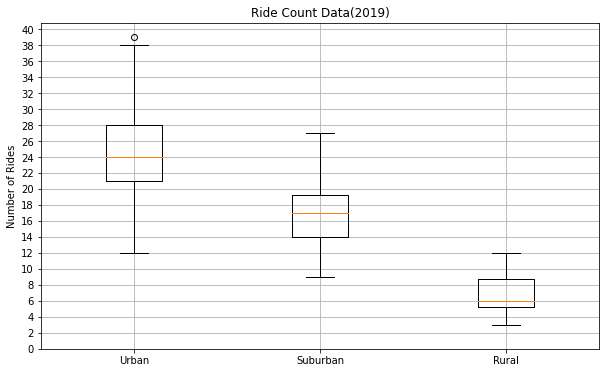

In [81]:
# create a box and whisker plot
x_labels = ['Urban','Suburban','Rural']
ride_count_data = [urban_cities_ride_count_df,suburban_cities_ride_count_df,rural_cities_ride_count_df]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,41,step=2))
ax.grid()
plt.savefig('Analysis/Figure2.png')
plt.show()

In [82]:
urban_cities_outlier = urban_cities_ride_count_df[urban_cities_ride_count_df==39].index[0]
urban_cities_outlier

'West Angela'

In [83]:
urban_fares = pyber_complete_df[pyber_complete_df['type']=='Urban']['fare']
suburban_fares = pyber_complete_df[pyber_complete_df['type']=='Suburban']['fare']
rural_fares = pyber_complete_df[pyber_complete_df['type']=='Rural']['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

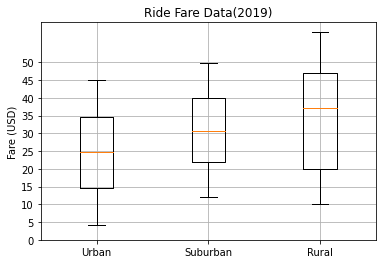

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [84]:
# create x labels
x_labels = ['Urban','Suburban','Rural']
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data,labels=x_labels)
ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare (USD)')
ax.set_yticks(np.arange(0,51,step = 5))
ax.grid()
plt.show()
urban_fares.describe()

In [85]:
urban_drivers = pyber_complete_df[pyber_complete_df['type']=='Urban']['driver_count']
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [86]:
suburban_drivers = pyber_complete_df[pyber_complete_df['type']=='Suburban']['driver_count']
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [87]:
rural_drivers = pyber_complete_df[pyber_complete_df['type']=='Rural']['driver_count']
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

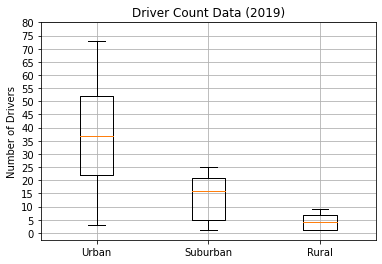

In [88]:
x_labels = ['Urban','Suburban','Rural']
data_to_plot = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax=plt.subplots()
ax.boxplot(data_to_plot,labels=x_labels)
ax.set_yticks(np.arange(0,81,step=5))
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.grid()
plt.show()

In [98]:
pyber_rides_per_type = pyber_complete_df.groupby('type').count()[['fare']]
pyber_rides_per_type
total_rides = pyber_rides_per_type['fare'].sum()
total_rides

2375

In [99]:
pyber_rides_per_type['percent_of_rides'] = pyber_rides_per_type['fare'] / total_rides

In [100]:
pyber_rides_per_type.head()

,fare,percent_of_rides
type,,
Rural,125,0.052632
Suburban,625,0.263158
Urban,1625,0.684211


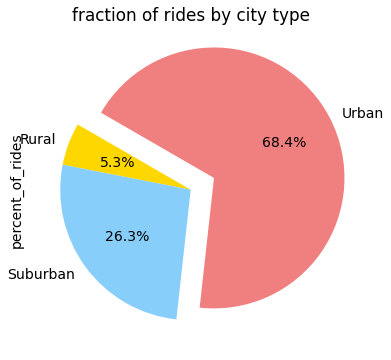

In [116]:
import matplotlib as mpl
plt.subplots(figsize=(10,6))
pyber_rides_per_type['percent_of_rides'].plot(kind = 'pie',
                                              explode = [0,0,0.2],
                                             colors = ['gold','lightskyblue','lightcoral'],
                                             startangle = 150,
                                             autopct = '%1.1f%%')
plt.title('fraction of rides by city type')
mpl.rcParams['font.size'] = 14